In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
stock_by_date_data = pd.DataFrame( pd.read_csv("../data/stock_shanghai_all.csv"),columns=["date","close","volume"])

In [3]:
stock_by_date_data["date"] = stock_by_date_data["date"].astype('datetime64[ns]')
stock_by_date_data["month"] = pd.DatetimeIndex(stock_by_date_data['date']).month
stock_by_date_data

,date,close,volume,month
0,2020-01-02,3085.1970,29247020800,1
1,2020-01-03,3083.7850,26149666816,1
2,2020-01-06,3083.4080,31257584128,1
3,2020-01-07,3104.8010,27658311168,1
4,2020-01-08,3066.8920,29787255296,1
...,...,...,...,...
238,2020-12-25,3396.5626,29454689500,12
239,2020-12-28,3397.2854,31618154200,12
240,2020-12-29,3379.0362,31176918500,12
241,2020-12-30,3414.4527,29102354300,12


In [4]:
stock_by_section_data =  pd.DataFrame( pd.read_csv("../data/stock_firstindex_all.csv"),columns=["date","code","close","volume"])
stock_by_section_data["date"] = stock_by_section_data["date"].astype('datetime64[ns]')
stock_by_section_data["month"] = pd.DatetimeIndex(stock_by_section_data['date']).month

In [5]:
stock_by_section_data

,date,code,close,volume,month
0,2020-01-02,sh.000032,1269.2530,1058755696,1
1,2020-01-03,sh.000032,1280.8110,1307384800,1
2,2020-01-06,sh.000032,1311.4340,2004029296,1
3,2020-01-07,sh.000032,1306.8510,1660143008,1
4,2020-01-08,sh.000032,1296.6780,1650793008,1
...,...,...,...,...,...
4855,2020-12-25,sh.000113,1963.1673,938263100,12
4856,2020-12-28,sh.000113,1967.5584,1020108100,12
4857,2020-12-29,sh.000113,1909.0869,663042600,12
4858,2020-12-30,sh.000113,1912.6557,552844000,12


In [6]:
all_mean = stock_by_date_data.groupby("month")["close"].mean()
type(all_mean)
all_mean[1]

3078.654125

In [7]:
pd.set_option('display.max_rows',None)
all_section = stock_by_section_data.groupby(["month","code"])["close"].mean()

In [8]:
type(all_section)
all_section[1]["sh.000032"]

1263.3275624999999

In [9]:
# increase ratio from june to dec
all_ratio1 = (all_mean[12] - all_mean[5])/all_mean[5]
all_ratio2 = (all_mean[5] - all_mean[1])/all_mean[1]
print(all_ratio1,all_ratio2)

0.18577553115272796 -0.0687212928365791


In [10]:
codes = stock_by_section_data.code.unique()

In [11]:
ratio_1 = []
ratio_2 = []
for code in codes:
    print("code:",code)
    print("growth rate from jan to may ")
    cur_ratio1 = (all_section[5][code] - all_section[1][code])/all_section[1][code]
    ratio_1.append(cur_ratio1)
    print(cur_ratio1)
    print("growth rate from may to dec ")
    cur_ratio2 = (all_section[12][code] - all_section[5][code])/all_section[5][code]
    ratio_2.append(cur_ratio2)
    print(cur_ratio2)
    print("-----------------------")
mean_cur_ratio1 = sum(ratio_1)/len(ratio_1)
mean_cur_ratio2 =  sum(ratio_2)/len(ratio_2)
print(mean_cur_ratio1)
print(mean_cur_ratio2)
    

code: sh.000032
growth rate from jan to may 
-0.19577735977894647
growth rate from may to dec 
0.10787634492127185
-----------------------
code: sh.000033
growth rate from jan to may 
-0.10978053823402656
growth rate from may to dec 
0.3358276763836306
-----------------------
code: sh.000034
growth rate from jan to may 
-0.07765359344775767
growth rate from may to dec 
0.28599776519471926
-----------------------
code: sh.000035
growth rate from jan to may 
-0.11810718655707861
growth rate from may to dec 
0.5936328187698972
-----------------------
code: sh.000036
growth rate from jan to may 
0.12910202789935854
growth rate from may to dec 
0.4877012967472957
-----------------------
code: sh.000037
growth rate from jan to may 
0.14134091408801902
growth rate from may to dec 
0.28243903076506066
-----------------------
code: sh.000038
growth rate from jan to may 
-0.13194541770179513
growth rate from may to dec 
0.12288156024006189
-----------------------
code: sh.000039
growth rate from

In [12]:
all_code = set(codes)
stage1_code = set()
stage2_code = set()
diff_stage1 = []
diff_stage2 = []
for index,value in enumerate(ratio_1):
    diff_stage1.append(mean_cur_ratio1 - value)
   

    
    if value <mean_cur_ratio1:
        print(value,codes[index])
        stage1_code.add(codes[index])
print("_________________________________")
for index,value in enumerate(ratio_2):
    diff_stage2.append(value - mean_cur_ratio2)
    if value >mean_cur_ratio2:
        print(value,codes[index])
        stage2_code.add(codes[index])
print("——————————————————————————————————")
inter_set = stage1_code &stage2_code
union_set = stage1_code |stage2_code
diff_set = all_code -union_set

print(inter_set)
print("——————————————————————————————————")
print(stage2_code - stage1_code)
print("——————————————————————————————————")
print(stage1_code - stage2_code)
print("——————————————————————————————————")
print(diff_set)       
code_pair = {'sh.000034':'SSE industry','sh.000106': '380 industry', 'sh.000105':'380 material', 'sh.000033':'SSE material', 'sh.000035':'SSE optional', 'sh.000107':'380 optional','sh.000108':'380 consumption', 'sh.000037':'SSE medicine', 'sh.000036':'SSE consumption','sh.000110':'380 finance', 'sh.000041':'SSE  public utility', 'sh.000104':'380 energy', 'sh.000038':'SSE finance', 'sh.000113':'380 public utility', 'sh.000032':'SSE energy','sh.000040':'SSE telecommunication', 'sh.000039':'SSE information', 'sh.000112':'380 telecommunication', 'sh.000109':'380 medicine', 'sh.000111':'380 information'}   
stock_pair =  {'sh.000034':1,'sh.000106': 2, 'sh.000105':2, 'sh.000033':1, 'sh.000035':1, 'sh.000107':2,'sh.000108':2, 'sh.000037':1, 'sh.000036':1,'sh.000110':2, 'sh.000041':1, 'sh.000104':2, 'sh.000038':1, 'sh.000113':2, 'sh.000032':1,'sh.000040':1, 'sh.000039':1, 'sh.000112':2, 'sh.000109':2, 'sh.000111':2}










-0.19577735977894647 sh.000032
-0.10978053823402656 sh.000033
-0.07765359344775767 sh.000034
-0.11810718655707861 sh.000035
-0.13194541770179513 sh.000038
-0.09558907347272137 sh.000041
-0.20210230051881137 sh.000104
-0.08356963991495381 sh.000105
-0.03840641135055948 sh.000106
-0.10090262579474801 sh.000107
-0.10482587253336291 sh.000110
-0.03548255333198369 sh.000113
_________________________________
0.3358276763836306 sh.000033
0.28599776519471926 sh.000034
0.5936328187698972 sh.000035
0.4877012967472957 sh.000036
0.28243903076506066 sh.000037
0.2725768848856269 sh.000105
0.1948614039469853 sh.000106
0.39415975396656283 sh.000107
0.32416460062856245 sh.000108
——————————————————————————————————
{'sh.000107', 'sh.000106', 'sh.000033', 'sh.000035', 'sh.000105', 'sh.000034'}
——————————————————————————————————
{'sh.000036', 'sh.000108', 'sh.000037'}
——————————————————————————————————
{'sh.000041', 'sh.000038', 'sh.000032', 'sh.000113', 'sh.000104', 'sh.000110'}
——————————————————————————

In [13]:
for k in code_pair:
    print(k," & ",code_pair[k]," \\\\ ")

sh.000034  &  SSE industry  \\ 
sh.000106  &  380 industry  \\ 
sh.000105  &  380 material  \\ 
sh.000033  &  SSE material  \\ 
sh.000035  &  SSE optional  \\ 
sh.000107  &  380 optional  \\ 
sh.000108  &  380 consumption  \\ 
sh.000037  &  SSE medicine  \\ 
sh.000036  &  SSE consumption  \\ 
sh.000110  &  380 finance  \\ 
sh.000041  &  SSE  public utility  \\ 
sh.000104  &  380 energy  \\ 
sh.000038  &  SSE finance  \\ 
sh.000113  &  380 public utility  \\ 
sh.000032  &  SSE energy  \\ 
sh.000040  &  SSE telecommunication  \\ 
sh.000039  &  SSE information  \\ 
sh.000112  &  380 telecommunication  \\ 
sh.000109  &  380 medicine  \\ 
sh.000111  &  380 information  \\ 


In [14]:
# draw scatter graph
def addex(code):
    return code_pair[code]
def addcategory(code):
    return stock_pair[code]
codes_s =  pd.Series(codes)

diff_stage1_s = pd.Series(diff_stage1)
diff_stage2_s = pd.Series(diff_stage2)

df=pd.DataFrame({"codes":codes_s,"diff_stage1":diff_stage1_s,"diff_stage2":diff_stage2_s})
df["code_ex"] = df["codes"].map(addex)
df["category"] = df["codes"].map(addcategory)
df.sort_values("category")
df

,codes,diff_stage1,diff_stage2,code_ex,category
0,sh.000032,0.169201,-0.078095,SSE energy,1
1,sh.000033,0.083204,0.149857,SSE material,1
2,sh.000034,0.051077,0.100027,SSE industry,1
3,sh.000035,0.091531,0.407662,SSE optional,1
4,sh.000036,-0.155679,0.301730,SSE consumption,1
5,sh.000037,-0.167917,0.096468,SSE medicine,1
6,sh.000038,0.105369,-0.063090,SSE finance,1
7,sh.000039,-0.119026,-0.172629,SSE information,1
8,sh.000040,-0.019067,-0.276318,SSE telecommunication,1
9,sh.000041,0.069013,-0.107604,SSE public utility,1


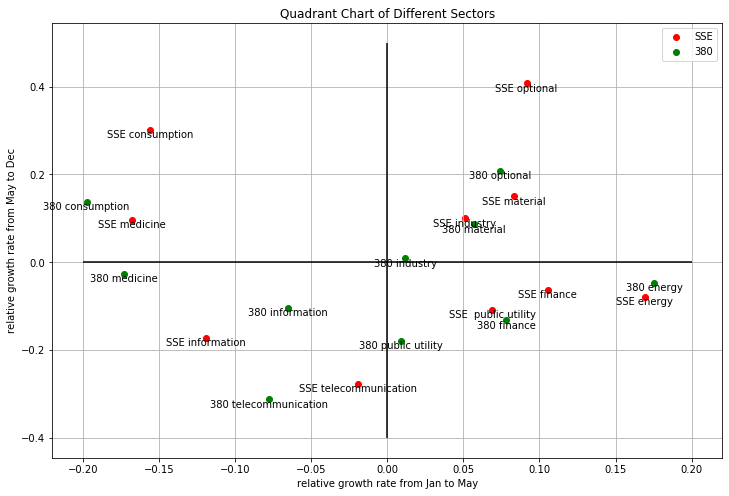

In [15]:
plt.figure(figsize=(12, 8))

plt.scatter(df["diff_stage1"][0:10], df["diff_stage2"][0:10],color = 'red',label="SSE")

plt.scatter(df["diff_stage1"][10:], df["diff_stage2"][10:],color = 'green',label="380")
        
plt.xlabel("relative growth rate from Jan to May")
plt.ylabel("relative growth rate from May to Dec")
for a, b,l in zip(df["diff_stage1"],df["diff_stage2"],df["code_ex"]):
    plt.text(a,b,l,ha="center",va="top")
plt.vlines(x = 0,ymin = -0.4,ymax= 0.5,colors = "black")
plt.hlines(y=0,xmin =-0.2,xmax=0.2,colors = "black" )
plt.grid(True)
plt.legend()
plt.title("Quadrant Chart of Different Sectors")
plt.savefig("Quadrant_chart.png")